In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [9]:
all_gen_files = [f for f in Path("./generated").iterdir()]
docs = []
for one_file in all_gen_files:
    with open(one_file, 'r', encoding="latin-1") as file:
            text = file.read()
            docs.append({
                'path': one_file,
                'name': one_file.stem,
                'text': text,
                'length': len(text),
            })
all_gen_files_df = pd.DataFrame(docs)

In [12]:
all_bbc_files = [f for f in Path("./data/datasets/bbc/politics").iterdir()]
docs = []
for one_file in all_bbc_files:
    with open(one_file, 'r', encoding="utf-8") as file:
            text = file.read()
            docs.append({
                'path': one_file,
                'name': one_file.stem,
                'text': text,
                'length': len(text),
            })
all_bbc_files_df = pd.DataFrame(docs)

In [7]:
all_gen_files_df

,path,name,text,length
0,generated\001x.txt,001x,\n\nTitle: New Maternity Leave Plans Unveiled ...,3202
1,generated\002x.txt,002x,\nThomas Jefferson's legacy has been a constan...,2455
2,generated\003x.txt,003x,\n\nSexism in the workplace continues to be a ...,2932
3,generated\004x.txt,004x,"\n\nBlackpool, the popular seaside town in Lan...",1537
4,generated\005x.txt,005x,\n\nMr Brown has been under intense pressure t...,2575
...,...,...,...,...
412,generated\413x.txt,413x,\n\nSainsbury's has made a major donation to t...,977
413,generated\414x.txt,414x,"\n\nThe election is now over, with Tony Blair ...",3753
414,generated\415x.txt,415x,"\n\nThe election season is upon us, with MPs f...",1445
415,generated\416x.txt,416x,\n\nHoward's Lib Dem Strategy Pays Off As Tory...,1386


In [13]:
all_bbc_files_df

,path,name,text,length
0,data\datasets\bbc\politics\001.txt,001,Labour plans maternity pay rise\n\nMaternity p...,2598
1,data\datasets\bbc\politics\002.txt,002,Watchdog probes e-mail deletions\n\nThe inform...,2326
2,data\datasets\bbc\politics\003.txt,003,Hewitt decries 'career sexism'\n\nPlans to ext...,3109
3,data\datasets\bbc\politics\004.txt,004,Labour chooses Manchester\n\nThe Labour Party ...,1471
4,data\datasets\bbc\politics\005.txt,005,Brown ally rejects Budget spree\n\nChancellor ...,2860
...,...,...,...,...
412,data\datasets\bbc\politics\413.txt,413,Sainsbury's Labour election gift\n\nScience Mi...,1152
413,data\datasets\bbc\politics\414.txt,414,Blair 'up for it' ahead of poll\n\nTony Blair ...,3105
414,data\datasets\bbc\politics\415.txt,415,Labour MP praises Tory campaign\n\nThe Conserv...,1508
415,data\datasets\bbc\politics\416.txt,416,Top Tories on Lib Dem 'hit list'\n\nThe Libera...,1733


## Text Length Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

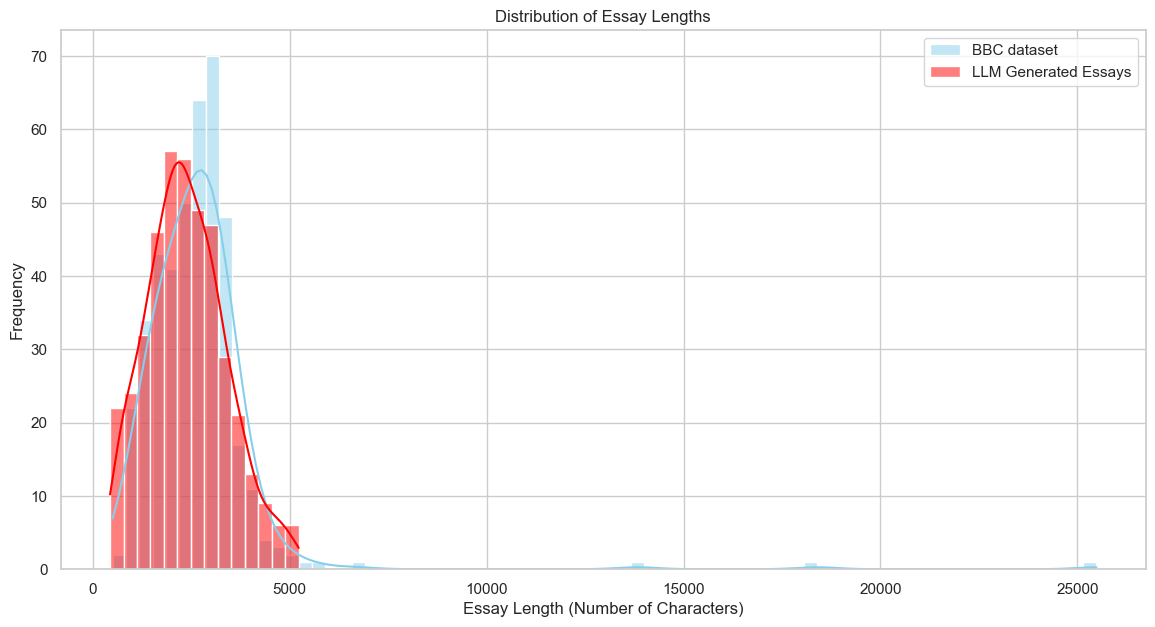

In [15]:

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Distribution of essay lengths for LLM generated essays
sns.histplot(all_bbc_files_df['length'], color="skyblue", label='BBC dataset', kde=True)
sns.histplot(all_gen_files_df['length'], color="red", label='LLM Generated Essays', kde=True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
# combine all the data into 1
all_gen_files_df['generated'] = 1
all_bbc_files_df['generated'] = 0
all_data_df = pd.concat([all_gen_files_df, all_bbc_files_df])

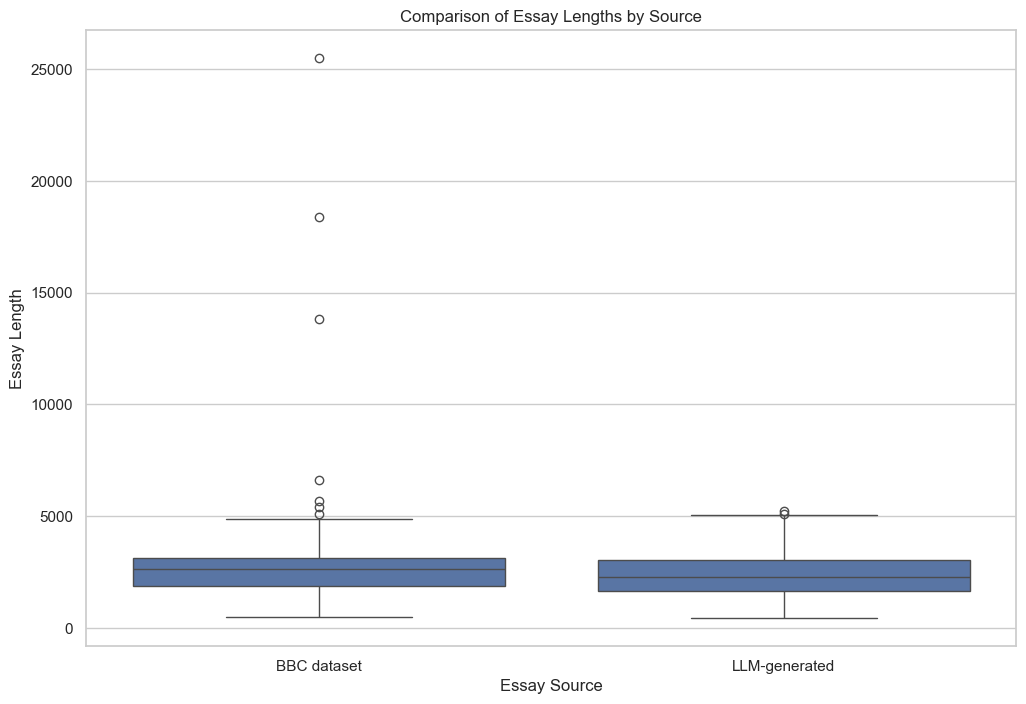

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='generated', y='length', data=all_data_df)
plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length')
plt.xticks([0, 1], ['BBC dataset', 'LLM-generated'])
plt.show()

In [20]:
def calculate_text_metrics_simple(text):
    words = text.split()
    sentences = text.split('.')
    word_count = len(words)
    unique_word_count = len(set(words))
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    return word_count, unique_word_count, sentence_count, avg_word_length

# Apply the function to the 'text' column
all_data_df['metrics'] = all_data_df['text'].apply(calculate_text_metrics_simple)

# Expand the 'metrics' column into separate columns
all_data_df[['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']] = pd.DataFrame(all_data_df['metrics'].tolist(), index=all_data_df.index)

# Drop the 'metrics' column as it's no longer needed
all_data_df.drop('metrics', axis=1, inplace=True)

# Group by 'generated' to compare these metrics between student-written and LLM-generated essays
comparison_metrics = all_data_df.groupby('generated')[['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']].mean()
comparison_metrics

,word_count,unique_word_count,sentence_count,avg_word_length
generated,,,,
0,453.973621,257.851319,22.227818,4.921335
1,376.637890,246.386091,17.345324,5.286948


## EDA - Common words

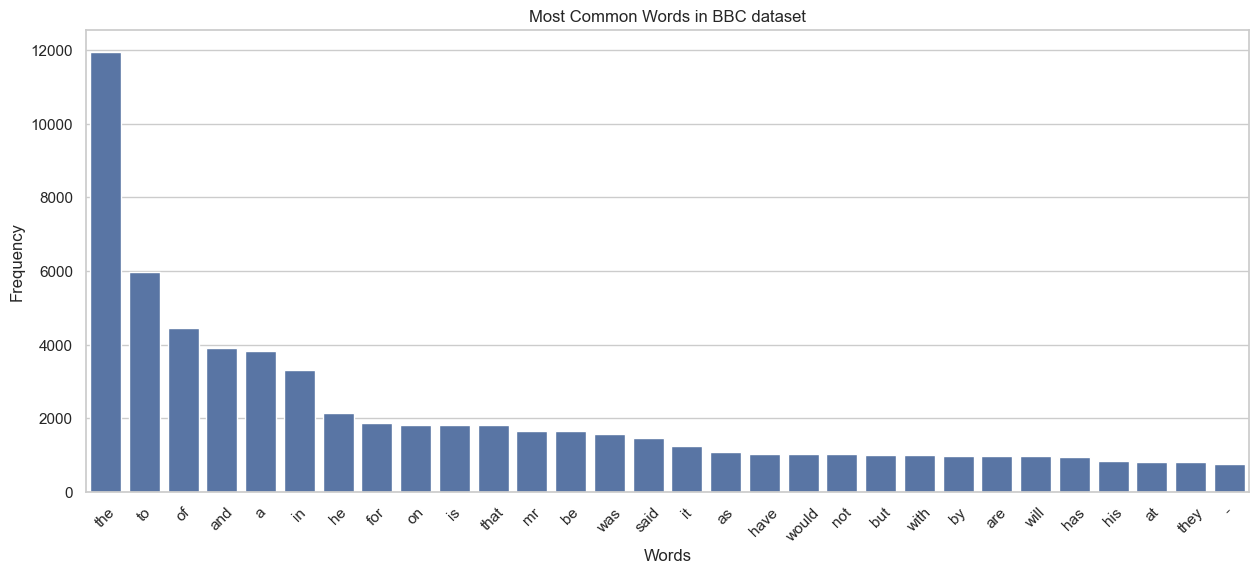

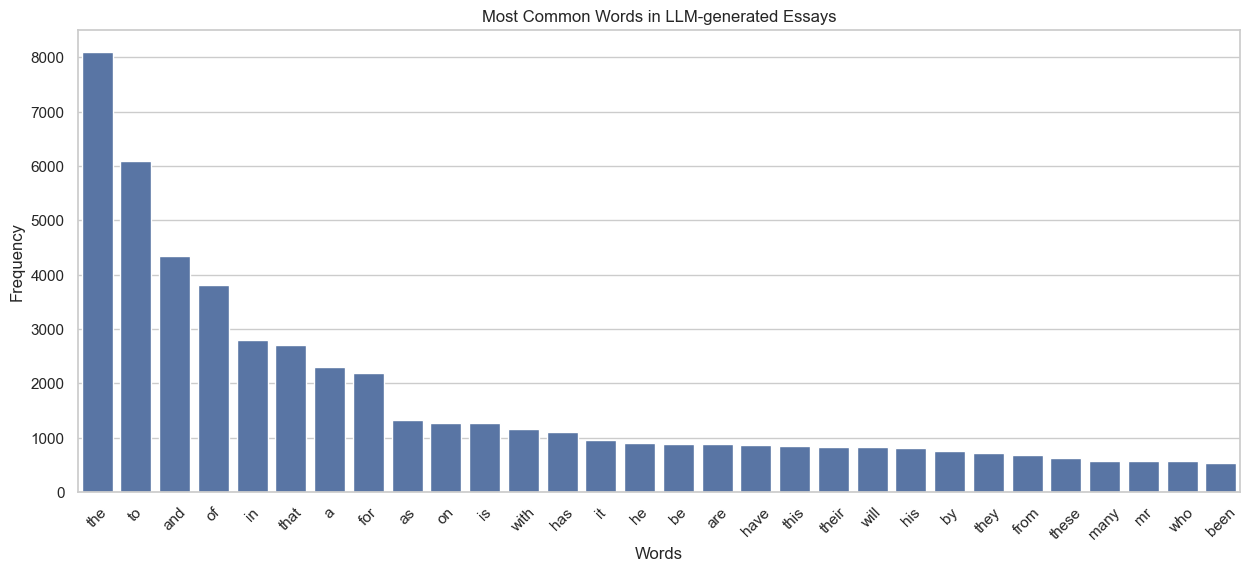

In [42]:
from collections import Counter
import itertools

def plot_most_common_words(text_series, num_words=30, title="Most Common Words"):
    all_text = ' '.join(text_series).lower()
    words = all_text.split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(num_words)
    
    # Plot the most common words
    plt.figure(figsize=(15, 6))
    sns.barplot(x=[word for word, freq in common_words], y=[freq for word, freq in common_words])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_most_common_words(all_data_df[all_data_df['generated'] == 0]['text'], title="Most Common Words in BBC dataset")
plot_most_common_words(all_data_df[all_data_df['generated'] == 1]['text'], title="Most Common Words in LLM-generated Essays")


top_words: [('said', 2241), ('mr', 1686), ('labour', 767), ('government', 732), ('people', 623), ('election', 608), ('party', 586), ('blair', 578), ('minister', 436), ('new', 430)]


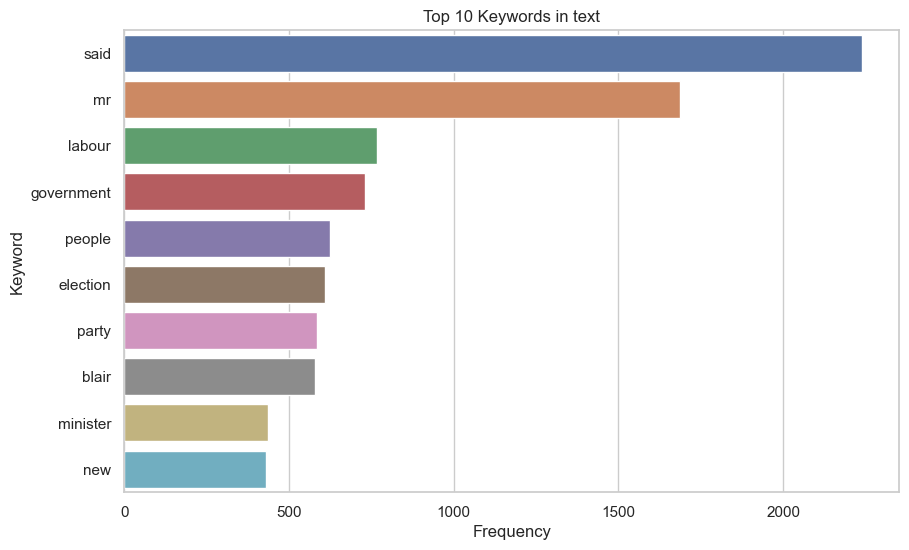


top_words: [('mr', 764), ('government', 677), ('party', 529), ('people', 454), ('uk', 446), ('political', 445), ('said', 411), ('labour', 386), ('election', 375), ('new', 374)]


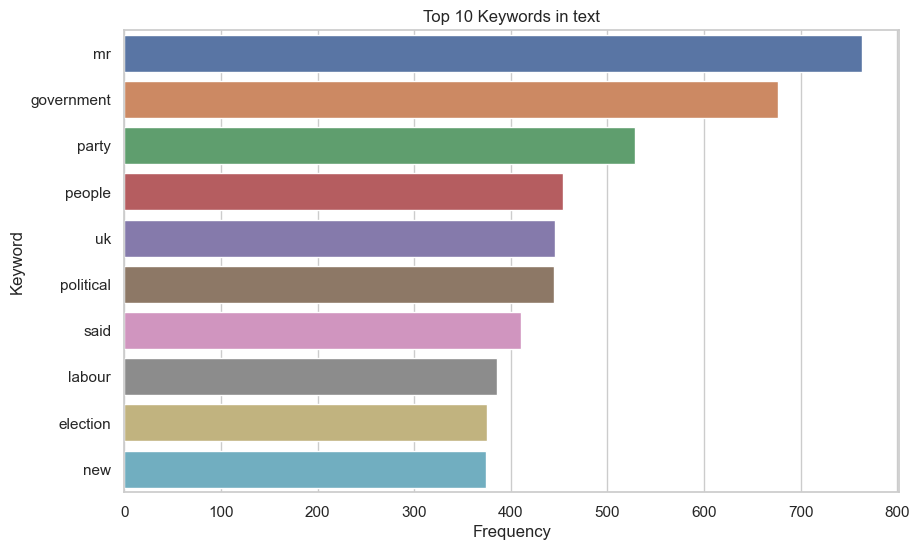

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_keywords(data, column, num_keywords=10):
    vec = CountVectorizer(stop_words='english').fit(data[column])
    bag_of_words = vec.transform(data[column])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_words = words_freq[:num_keywords]
    print("\ntop_words:", top_words)
    # Convert to DataFrame
    top_df = pd.DataFrame(top_words, columns=['Keyword', 'Frequency'])
    
    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(x='Frequency', y='Keyword', hue="Keyword", data=top_df)
    plt.title(f'Top {num_keywords} Keywords in {column}')
    plt.show()



# Plot top keywords for BBC
plot_top_keywords(all_bbc_files_df, 'text')

# Plot top keywords for LLM
plot_top_keywords(all_gen_files_df, 'text')

## Thematic Analysis: Keywords

An examination of the most frequent keywords in the `source_text` of `train_prompts.csv` and the `text` of `train_essays.csv` reveals a strong thematic alignment between the prompts and the essays. Keywords such as 'electoral', 'college', 'vote', and 'president' are prominent in both, indicating that students are closely engaging with the core topics presented in the prompts. This overlap suggests that the prompts are effective in directing the focus of the essays.

- **Prompts**: The keywords 'electoral', 'vote', 'electors', and 'college' are among the most mentioned, signaling a focus on the electoral process.
- **Essays**: These keywords are echoed with high frequency ('electoral' appearing 7234 times, 'college' 6081 times), underscoring the essays' relevance to the prompts. Additionally, terms like 'people' and 'states' suggest a broader discussion of the electoral theme within a societal context.

The significant presence of topic-related vocabulary in the essays may also provide useful features for machine learning models tasked with distinguishing between student-written and LLM-generated texts.


In [27]:
def get_top_n_grams(corpus, n=None, n_grams=2):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 10 bigrams in the prompts
# top_bigrams_prompts = get_top_n_grams(train_prompts_df['source_text'], n=10, n_grams=2)

# Get the top 10 bigrams in the BBC data
top_bigrams_bbc = get_top_n_grams(all_bbc_files_df['text'], n=10, n_grams=2)

# Get the top 10 bigrams in the LLM data
top_bigrams_llm = get_top_n_grams(all_gen_files_df['text'], n=10, n_grams=2)

# Display the top bigrams in prompts and essays
print("\nTop 10 Bigrams in BBC data:")
for bigram, freq in top_bigrams_bbc:
    print(f"{bigram}: {freq}")

print("\n")

print("Top 10 Bigrams in LLM generated:")
for bigram, freq in top_bigrams_llm:
    print(f"{bigram}: {freq}")


Top 10 Bigrams in BBC data:
mr blair: 326
prime minister: 276
mr brown: 240
tony blair: 179
general election: 163
mr howard: 154
told bbc: 140
michael howard: 130
said mr: 112
kilroy silk: 110


Top 10 Bigrams in LLM generated:
prime minister: 219
labour party: 157
mr brown: 142
mr blair: 116
general election: 103
tony blair: 91
critics argue: 87
remains seen: 77
recent years: 74
economic growth: 74


### This require the prompts in order to work

## Thematic Analysis: Bi-gram

Our N-gram analysis reveals common bigrams within the prompts and essays, providing insight into recurring themes and phrases:

- **Prompts**: Frequent bigrams like 'electoral college' and 'voting system' indicate a focus on electoral processes. Other phrases such as 'presidential election' and 'popular vote' suggest discussions around democratic principles and voting mechanisms.

- **Essays**: The essays reflect this with bigrams like 'electoral college' and 'presidential election' also ranking highly. Additional bigrams like 'climate change' and 'economic impact' suggest that students are connecting the prompt themes to broader societal issues.

This analysis underscores the essays' alignment with prompt themes while also revealing how students may extend the conversation to include related topics of interest. These insights can inform feature engineering for machine learning models by highlighting phrase patterns that differentiate between student and LLM-generated texts.


### Thematic Coherence Analysis

Thematic coherence can be assessed by looking at how consistently essays stay on topic. A common approach is to use Latent Semantic Analysis (LSA) to project essays and prompts into a lower-dimensional space and measure the similarity.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer


def calculate_thematic_coherence(essays, prompts):
    vectorizer = TfidfVectorizer(stop_words='english')
    dtm = vectorizer.fit_transform(essays + prompts)

    lsa = TruncatedSVD(n_components=1)
    dtm_lsa = lsa.fit_transform(dtm)
    dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

    essay_vectors = dtm_lsa[:len(essays)]
    prompt_vectors = dtm_lsa[len(essays):]

    coherence_scores = cosine_similarity(essay_vectors, prompt_vectors)
    return coherence_scores.mean()

# Calculate thematic coherence between essays and prompts
coherence_score = calculate_thematic_coherence(
    list(train_essays_df['text']), 
    list(train_prompts_df['source_text'])
)

print(f"Thematic Coherence Score: {coherence_score}")

## Thematic Analysis: Coherence
- **Thematic Coherence**: Analysis using Latent Semantic Analysis (LSA) yielded a perfect coherence score of 1.0. This indicates that the essays are in complete thematic alignment with the prompts, suggesting a strong adherence to the provided subject matter. The high level of structure and relevance in the essays may be a key feature distinguishing student-written work from the potentially broader thematic scope of LLM-generated texts.

## Digit Writing Style Analysis

In [28]:
import re
import pandas as pd

# Define regex patterns for numerals and word representations of numbers
numeral_pattern = re.compile(r'\b\d+\b')  # Matches any whole number
word_number_pattern = re.compile(
    r'\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', re.IGNORECASE)  # Matches number words from one to ten

# Function to count occurrences of numerals and number words
def count_digit_styles(text, numeral_regex, word_number_regex):
    numeral_matches = len(re.findall(numeral_regex, text))
    word_number_matches = len(re.findall(word_number_regex, text))
    return numeral_matches, word_number_matches

# Create a copy of the slices to avoid SettingWithCopyWarning
train_essays_df = all_data_df.copy()

# Apply the function to the essays
train_essays_df[['numerals', 'number_words']] = train_essays_df['text'].apply(
    lambda x: count_digit_styles(x, numeral_pattern, word_number_pattern)).apply(pd.Series)

# Separate the essays into BBC and LLM based on the 'generated' flag
bbc_data = train_essays_df[train_essays_df['generated'] == 0]
llm_essays = train_essays_df[train_essays_df['generated'] == 1]

# Summarize the results
bbc_numerals = bbc_data['numerals'].sum()
bbc_number_words = bbc_data['number_words'].sum()
llm_numerals = llm_essays['numerals'].sum()
llm_number_words = llm_essays['number_words'].sum()

# Output the results
print(f"BBC data - Numerals: {bbc_numerals}, Number Words: {bbc_number_words}")
print(f"LLM Essays - Numerals: {llm_numerals}, Number Words: {llm_number_words}")

# Calculate the averages
avg_bbc_numerals = bbc_numerals / len(bbc_data)
avg_bbc_number_words = bbc_number_words / len(bbc_data)
avg_llm_numerals = llm_numerals / len(llm_essays) if len(llm_essays) > 0 else 0
avg_llm_number_words = llm_number_words / len(llm_essays) if len(llm_essays) > 0 else 0

# Output the average results
print()
print(f"Average Numerals per BBC article: {avg_bbc_numerals:.2f}")
print(f"Average Number Words per BBC article: {avg_bbc_number_words:.2f}")
print()
print(f"Average Numerals per LLM article: {avg_llm_numerals:.2f}")
print(f"Average Number Words per LLM article: {avg_llm_number_words:.2f}")

BBC data - Numerals: 2242, Number Words: 948
LLM Essays - Numerals: 470, Number Words: 564

Average Numerals per BBC article: 5.38
Average Number Words per BBC article: 2.27

Average Numerals per LLM article: 1.13
Average Number Words per LLM article: 1.35


The representation of digits in essays can provide insight into the writing styles of students versus LLMs. Our analysis examined the frequency of numerals and word representations of numbers within the essays.

### Findings:

- **Student Essays**:
  - Numerals: 7,757 occurrences
  - Number Words: 3,747 occurrences

- **LLM-Generated Essays**:
  - Numerals: 3 occurrences
  - Number Words: 6 occurrences

### Digit Usage Analysis

- **Student Essays**: On average, student-written essays use numerals (5.64 times) more frequently than number words (2.73 times), indicating a tendency to express numbers in digit form.
- **LLM-Generated Essays**: Due to the small sample size (only 3 essays), it's observed that LLMs use numerals (1.00 time) less frequently than number words (2.00 times). However, this trend should be interpreted with caution as it may not represent the broader behavior of LLMs.



## Clustering

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Function to preprocess text data
def preprocess_text(text):
    # Lowercase, remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Preprocess the essays
train_essays_df['preprocessed_text'] = train_essays_df['text'].apply(preprocess_text)

# Vectorize the essays
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_essays_df['preprocessed_text'])

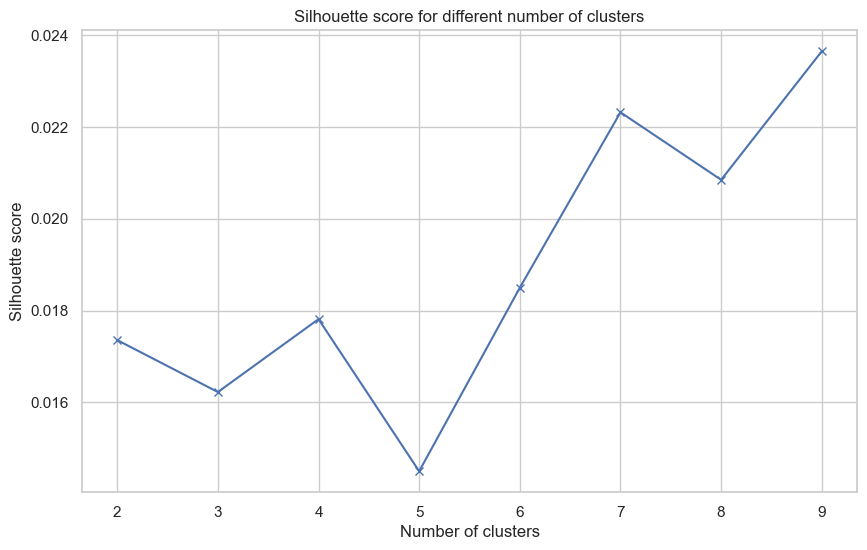

9

In [50]:
# Determine the optimal number of clusters using the silhouette score
range_n_clusters = list(range(2, 10))
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(tfidf_matrix, cluster_labels))

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different number of clusters')
plt.show()

# Identify the number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_avg) + 2  # Adding 2 because range starts at 2
optimal_num_clusters

In [31]:
kmeans = KMeans(n_clusters=2, random_state=1, n_init='auto')
clusters = kmeans.fit_predict(tfidf_matrix)

In [51]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [36]:
train_essays_df.reset_index(drop=True, inplace=True)

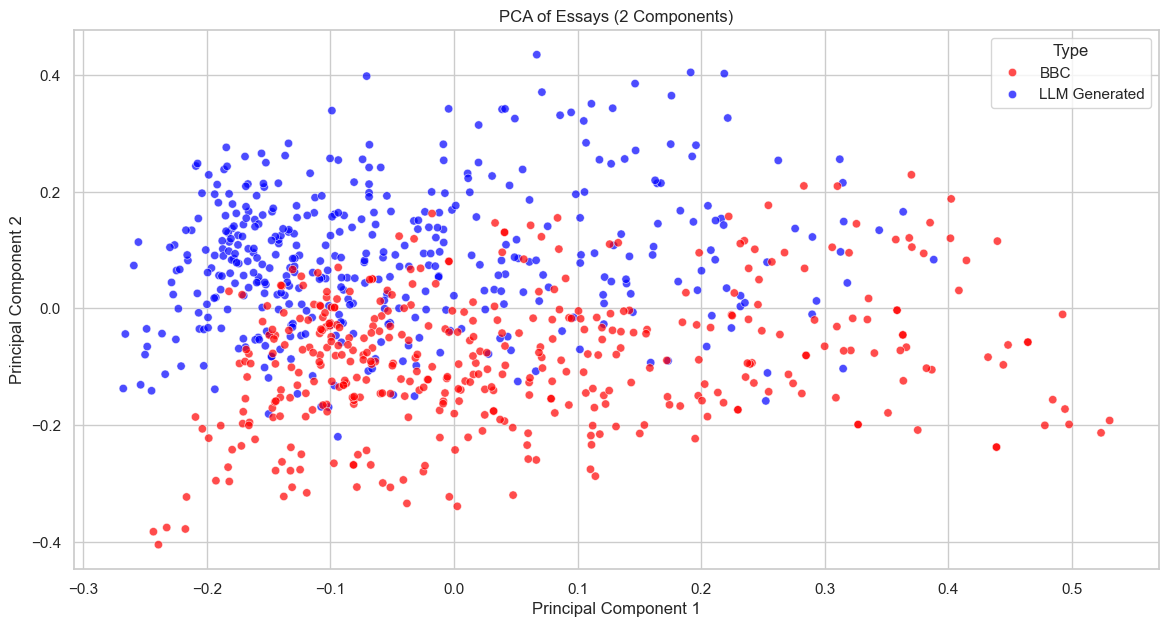

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_X_sample = pca.fit_transform(tfidf_matrix.toarray())  # Replace with actual TF-IDF matrix

# Add the PCA results to the dataframe
pca_df = pd.DataFrame(reduced_X_sample, columns=['PC1', 'PC2'])
pca_df['generated'] = train_essays_df['generated']

# Custom palette for plotting
custom_palette = {0: "red", 1: "blue"}
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='PC1', y='PC2', hue='generated', data=pca_df, 
    palette=custom_palette, alpha=0.7
)
plt.title('PCA of Essays (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['BBC', 'LLM Generated'], title='Type')

plt.show()

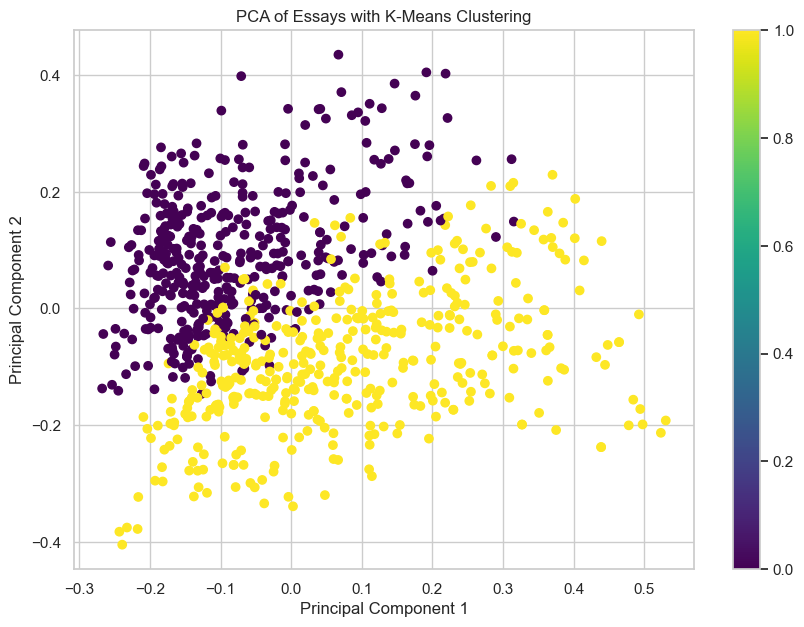

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_X_sample[:, 0], reduced_X_sample[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('PCA of Essays with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

These clusters likely represent essays responding to each question prompt.

In [ ]:
def plot_pca_for_prompt(prompt_id, df, tfidf_vectorizer):
    # Function to run PCA and plot for a given prompt_id using actual PCA
    # Filter the essays for the given prompt_id
    prompt_df = df[df['prompt_id'] == prompt_id]
    tfidf_matrix = tfidf_vectorizer.transform(prompt_df['preprocessed_text'])
    
    # Apply PCA
    pca = PCA(n_components=2, random_state=42)
    reduced_data = pca.fit_transform(tfidf_matrix.toarray())  # Convert to dense array for PCA
    
    # Create a dataframe for the PCA results
    pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    pca_df['generated'] = prompt_df['generated'].values  # Match indices
    
    # Plotting the PCA results
    plt.figure(figsize=(14, 7))
    scatter_plot = sns.scatterplot(
        x='PC1', y='PC2', hue='generated', data=pca_df, 
        palette=custom_palette, alpha=0.7
    )
    plt.title(f'PCA of Essays for Prompt {prompt_id}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Correct the legend by defining handles and labels manually
    handles, labels = scatter_plot.get_legend_handles_labels()
    plt.legend(handles, ['Student', 'LLM Generated'], title='Essay Type')
    
    plt.show()

In [ ]:
# Run PCA and plot for prompt_id 0
plot_pca_for_prompt(0, train_essays_df, tfidf_vectorizer)

# Run PCA and plot for prompt_id 1
plot_pca_for_prompt(1, train_essays_df, tfidf_vectorizer)